In [2]:
# %load finance_regression.py
#!/usr/bin/python

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    

import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

In [3]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

C:\Users\JehyeonHeo\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

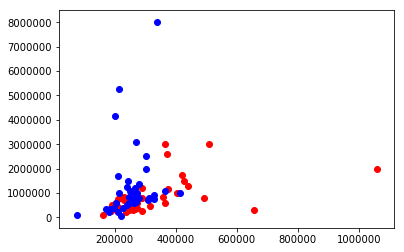

In [5]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
%matplotlib inline
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

C:\Users\JehyeonHeo\Anaconda3\envs\py27\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


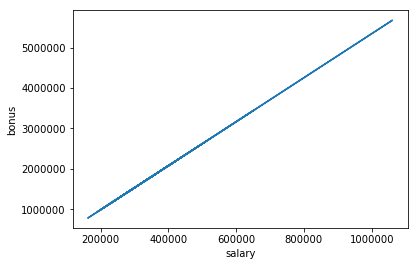

In [6]:
### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [9]:
#What are the slope and intercept?
print "Slope:", reg.coef_[0]
print "Intercept:", reg.intercept_

Slope: 5.44814028881
Intercept: -102360.543294


In [14]:
#What is the score of the regression on the training data?
print "The score of the regression on the training data:", reg.score(feature_train, target_train)

The score of the regression on the training data: 0.0455091926995


In [15]:
#What's that score on the testing data?
print "The score of the regression on the testing data:", reg.score(feature_test, target_test)

The score of the regression on the testing data: -1.48499241737


In [16]:
#Perform the regression of bonus against long term incentive--what's the score on the test data?
features_list2 = ["bonus", "long_term_incentive"]
data2 = featureFormat( dictionary, features_list2, remove_any_zeroes=True)
target2, features2 = targetFeatureSplit( data2 )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
feature_train2, feature_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

reg2 = LinearRegression()
reg2.fit(feature_train2, target_train2)
print "The score of the regression on the testing data when input is long term incentives:", reg2.score(feature_test2, target_test2)

The score of the regression on the testing data when input is long term incentives: -0.59271289995


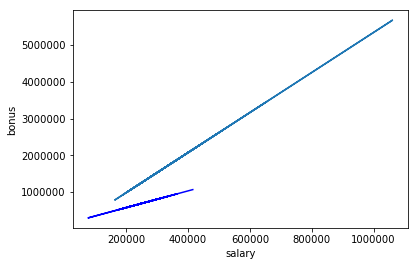

The slope when the regresser fits on the test data(with outlier): 2.27410114127


In [17]:
#We'll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier).
#What’s the slope of the new regression line?
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()
print "The slope when the regresser fits on the test data(with outlier):", reg.coef_[0]